In [1]:
import pennylane as qml
from pennylane import numpy as np
import numpy as npp
import matplotlib.pyplot as plt
import math

rng = np.random.default_rng(seed=53)


In [2]:
n_wires=4
dev = qml.device('default.qubit', wires=n_wires)
# filename='Saved_Data/t1.npy'
sample_x = np.linspace(0.1, 0.9, 10, endpoint=True)

In [3]:
def plot_u():
    # sample_x = np.linspace(0, 1, 10, endpoint=True)
    sample_y = np.sin(sample_x)

    plt.plot(sample_x, sample_y, 'bo-')
    plt.xlabel('x')
    plt.ylabel('sin(x)')
    plt.title('Plot of sin(x)')
    # plt.grid(True)
    plt.show()

In [4]:
def phi(x, j):  # Chebyshev
    return 2 * j * np.arccos(x)

def dphi1(x):
    return -1 / np.sqrt(1 - x ** 2)

def dphi2(x):
    return -x / ((1 - x ** 2) ** (3 / 2))

In [5]:
@qml.qnode(dev)
def u_x(x,parameters):
    # feature map
    for j in range(n_wires):
        qml.RY(phi=phi(x,j+1),wires=j)
    # ansatz
    qml.StronglyEntanglingLayers(weights=parameters, wires=range(dev.num_wires)) 
    # Cost function <Z>
    return qml.expval(qml.PauliZ(0))
    # return qml.expval(qml.PauliZ(0) @ qml.PauliZ(1) @ qml.PauliZ(2) @ qml.PauliZ(3))

# shape = qml.StronglyEntanglingLayers.shape(n_layers=2, n_wires=n_wires)
# w = rng.random(size=shape)
# print(qml.draw(u_x)(0.1,w))

In [6]:
def calculate_loss_boundry(parameters,err="MSE"):
    #boundry for u(x)=sin(x), u(0)=0, u(1)=0.84
    x = [0,2*npp.pi]
    u = [npp.sin(x[0]),npp.sin(x[1])]
    u_predict=[0,0]
    error = None
    for i in range(len(x)):
        u_predict[i]=u_x(x=x[i],parameters=parameters)

    if err=="MSE":
        #MSE
        error = np.mean((np.array(x) - np.array(u))**2)
    else:
        raise Exception('Not implemented yet')
    return error
# calculate_loss_boundry(weights)

In [7]:
def calculate_loss_interior(parameters,err="MSE"):
    # sample_x = np.linspace(0, 1, 10, endpoint=True)
    sample_u = np.sin(sample_x)
    u_predict=[0]*len(sample_x)
    error = None
    for i in range(len(sample_x)):
        u_predict[i]=u_x(x=sample_x[i],parameters=parameters)

    if err=="MSE":
        #MSE
        error = np.mean((np.array(u_predict) - np.array(sample_u))**2)
    else:
        raise Exception('Not implemented yet')
    return error

# shape = qml.StronglyEntanglingLayers.shape(n_layers=2, n_wires=n_wires)#TODO:// dynamic
# params = rng.random(size=shape)
# calculate_loss_interior(params)

In [8]:
def loss_func(params,l_b=0.0,l_i=1.0):
    loss= l_b*calculate_loss_boundry(params)+l_i*calculate_loss_interior(params)
    return loss

In [9]:
def plot_u_predict(params):
    # sample_x = np.linspace(0, 1, 10, endpoint=True)
    sample_u = np.sin(sample_x)

    sample_u_predict = []
    for x in sample_x:
        sample_u_predict.append(u_x(x, params))  # Assuming u_x is defined elsewhere


    plt.plot(sample_x, sample_u, 'bo-', label='Actual')
    plt.plot(sample_x, sample_u_predict, 'r*-', label='Predicted')
    plt.xlabel('x')
    plt.ylabel('sin(x)')
    plt.title('Plot of sin(x)')
    plt.legend()
    plt.grid(True)
    plt.show()
# plot_u_predict()

/home/natanil/anaconda3/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: invalid value encountered in arccos
  return f_raw(*args, **kwargs)


Step  0 
 params =  None  loss =  0.3525451083518587


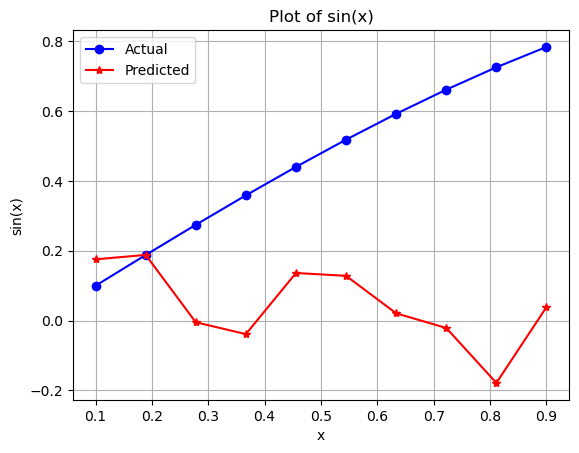

Step  10 
 params =  None  loss =  0.025893499995491093


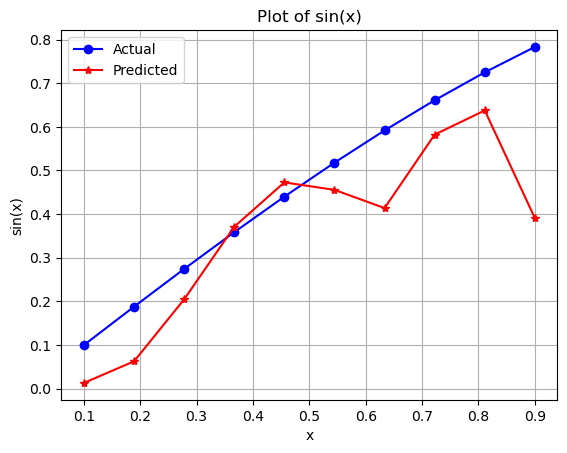

Step  20 
 params =  None  loss =  0.004141696049461495


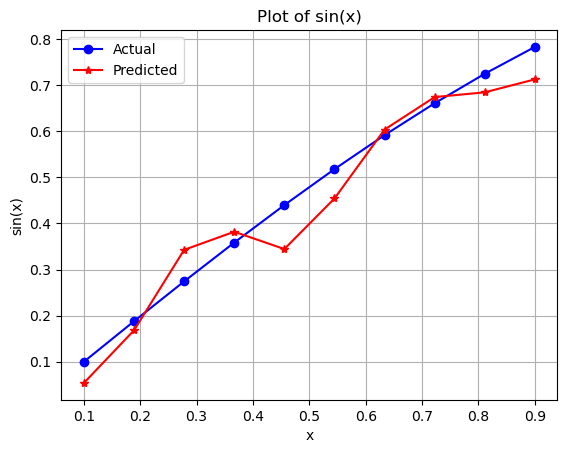

Step  30 
 params =  None  loss =  0.0012491448393839963


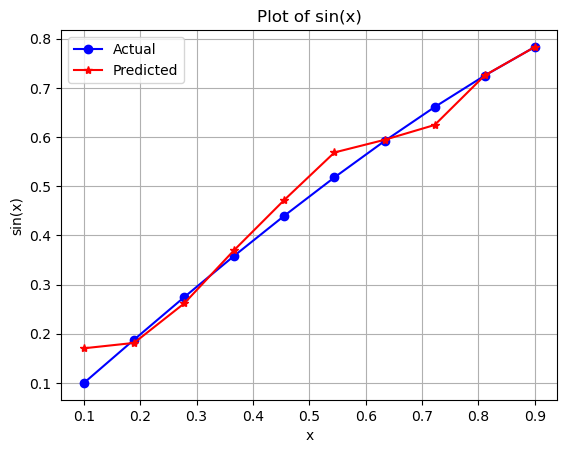

Step  40 
 params =  None  loss =  0.0002741506362004708


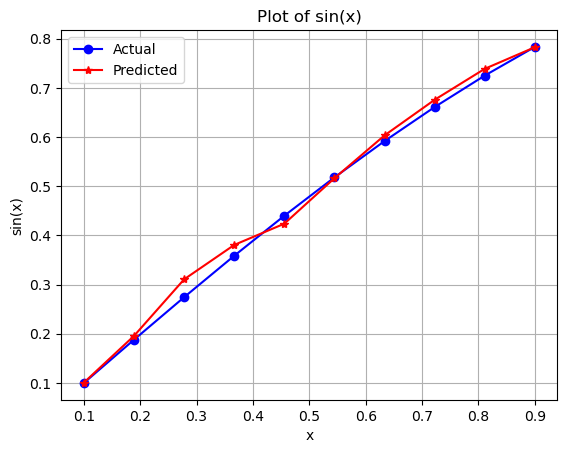

Step  50 
 params =  None  loss =  0.00010144432956382581


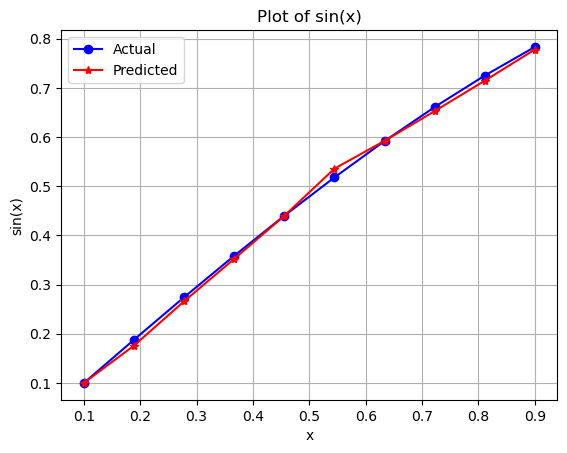

Step  60 
 params =  None  loss =  5.107179126576749e-05


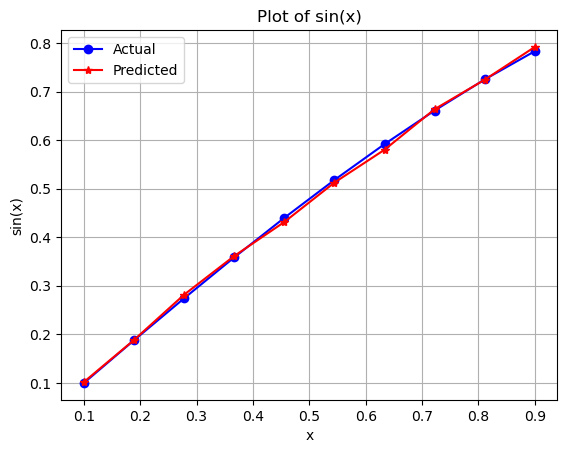

Step  70 
 params =  None  loss =  2.5097968766339424e-05


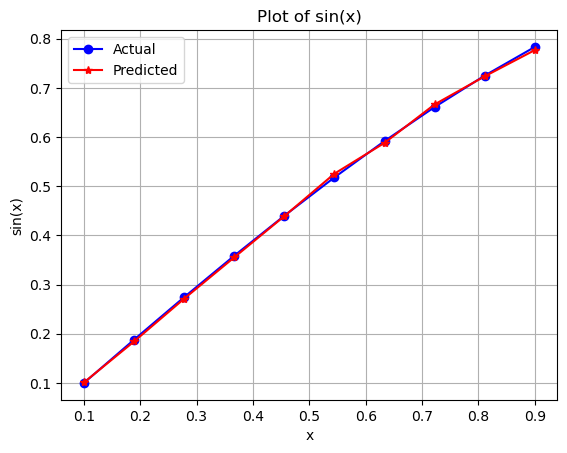

Step  80 
 params =  None  loss =  9.879362662651556e-06


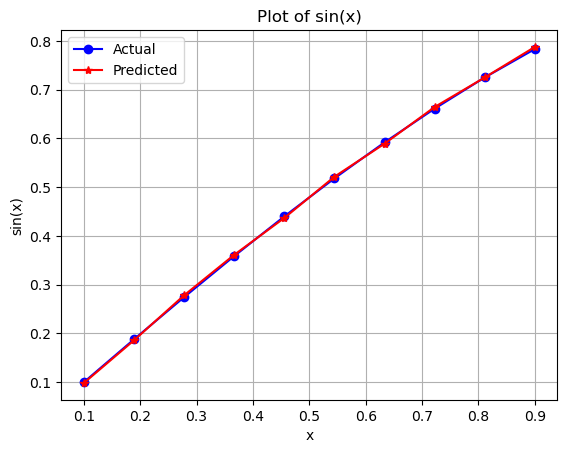

Step  90 
 params =  None  loss =  5.410419690641156e-06


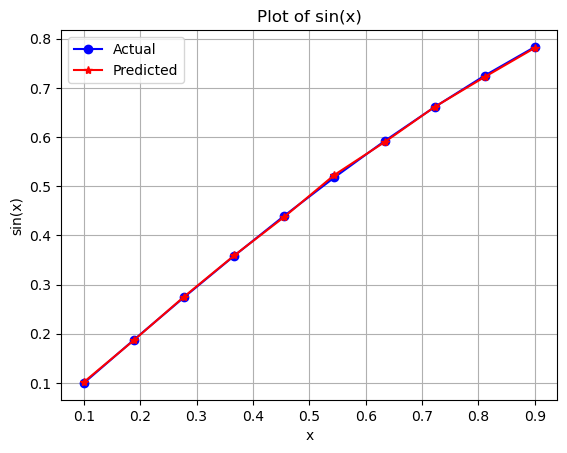

Step  100 
 params =  None  loss =  3.6945614553706237e-06


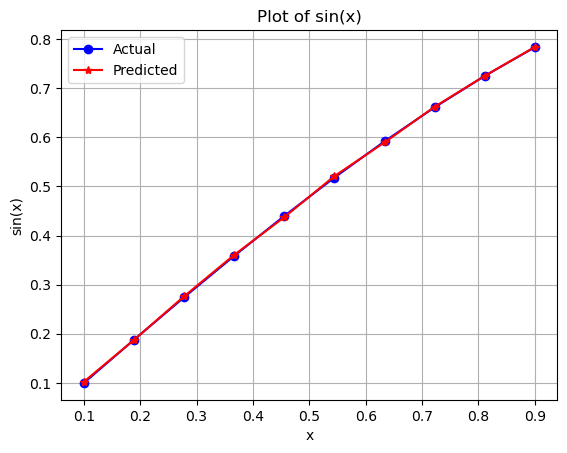

KeyboardInterrupt: 

In [10]:
shape = qml.StronglyEntanglingLayers.shape(n_layers=4, n_wires=n_wires)#TODO:// dynamic
params = rng.random(size=shape)
# print('dsfdfsdfs ',params)
# opt = qml.GradientDescentOptimizer() #TODO:// ADAM
opt = qml.AdamOptimizer(0.05, beta1=0.9, beta2=0.999)
for i in range(110):
    params, loss = opt.step_and_cost(loss_func, params)
    if i%10==0:
        print("Step ", i, "\n params = ", None,' loss = ',loss)
        plot_u_predict(params)
        # np.save(filename, params)
        

In [ ]:
# print(params)
# np.save(filename, params)
# loaded_params = np.load(filename)
# print("Loaded parameters:", loaded_params)

In [ ]:
# plot_u_predict(loaded_params)
# # sample_x = np.linspace(0, 1, 10, endpoint=True)
# print(sample_x)
# x=0.29
# print(np.sin(x))
# print(u_x(parameters=loaded_params,x=x))
